# Import pose_angle.csv data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# df = pd.read_csv("Dataset/pose_angles.csv")
df = pd.read_csv("Dataset/pose_angles_2.csv")

df = df.drop('num', axis = 1)
df.head()

,ang1,ang2,ang3,ang4,ang5,ang6,ang7,ang8,label
0,177.096508,176.743567,172.056864,160.104694,91.398300,88.715769,178.867878,173.454588,arm_stretch_up
1,87.079278,158.026430,74.970983,179.849378,97.242176,86.651312,164.546140,171.771705,arm_stretch_up
2,170.111038,165.605905,143.082512,174.314324,112.866601,87.103444,179.170967,178.775633,arm_stretch_up
3,118.656589,173.928318,99.040705,160.067810,85.740309,83.830039,176.184689,167.883687,arm_stretch_up
4,167.439284,166.935871,178.892527,168.519428,78.989211,101.116224,55.534760,72.243128,arm_stretch_up


In [19]:
# get X, y
X = df.values[:, :-1]
y = df.values[:, -1]

In [20]:
X.shape

(513, 8)

In [21]:
y.shape

(513,)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(359, 8) (154, 8) (359,) (154,)


# Visualize Dataset

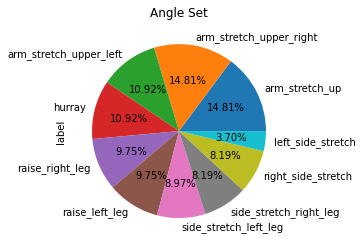

In [17]:
target_names = ['arm_stretch_up', 'arm_stretch_upper_right', 'arm_stretch_upper_left', 
                'hurray', 'raise_right_leg', 'raise_left_leg', 
                'side_stretch_left_leg', 'side_stretch_right_leg', 
                'right_side_stretch', 'left_side_stretch']
# df['label'].value_counts().plot.pie(autopct='%.2f%%')
# df['label'].value_counts().plot.pie(autopct='%0.2f%%', labels=target_names)
df['label'].value_counts().plot.pie(autopct='%0.2f%%', 
                                    labels=target_names,
                                    title='Angle Set')
plt.show()

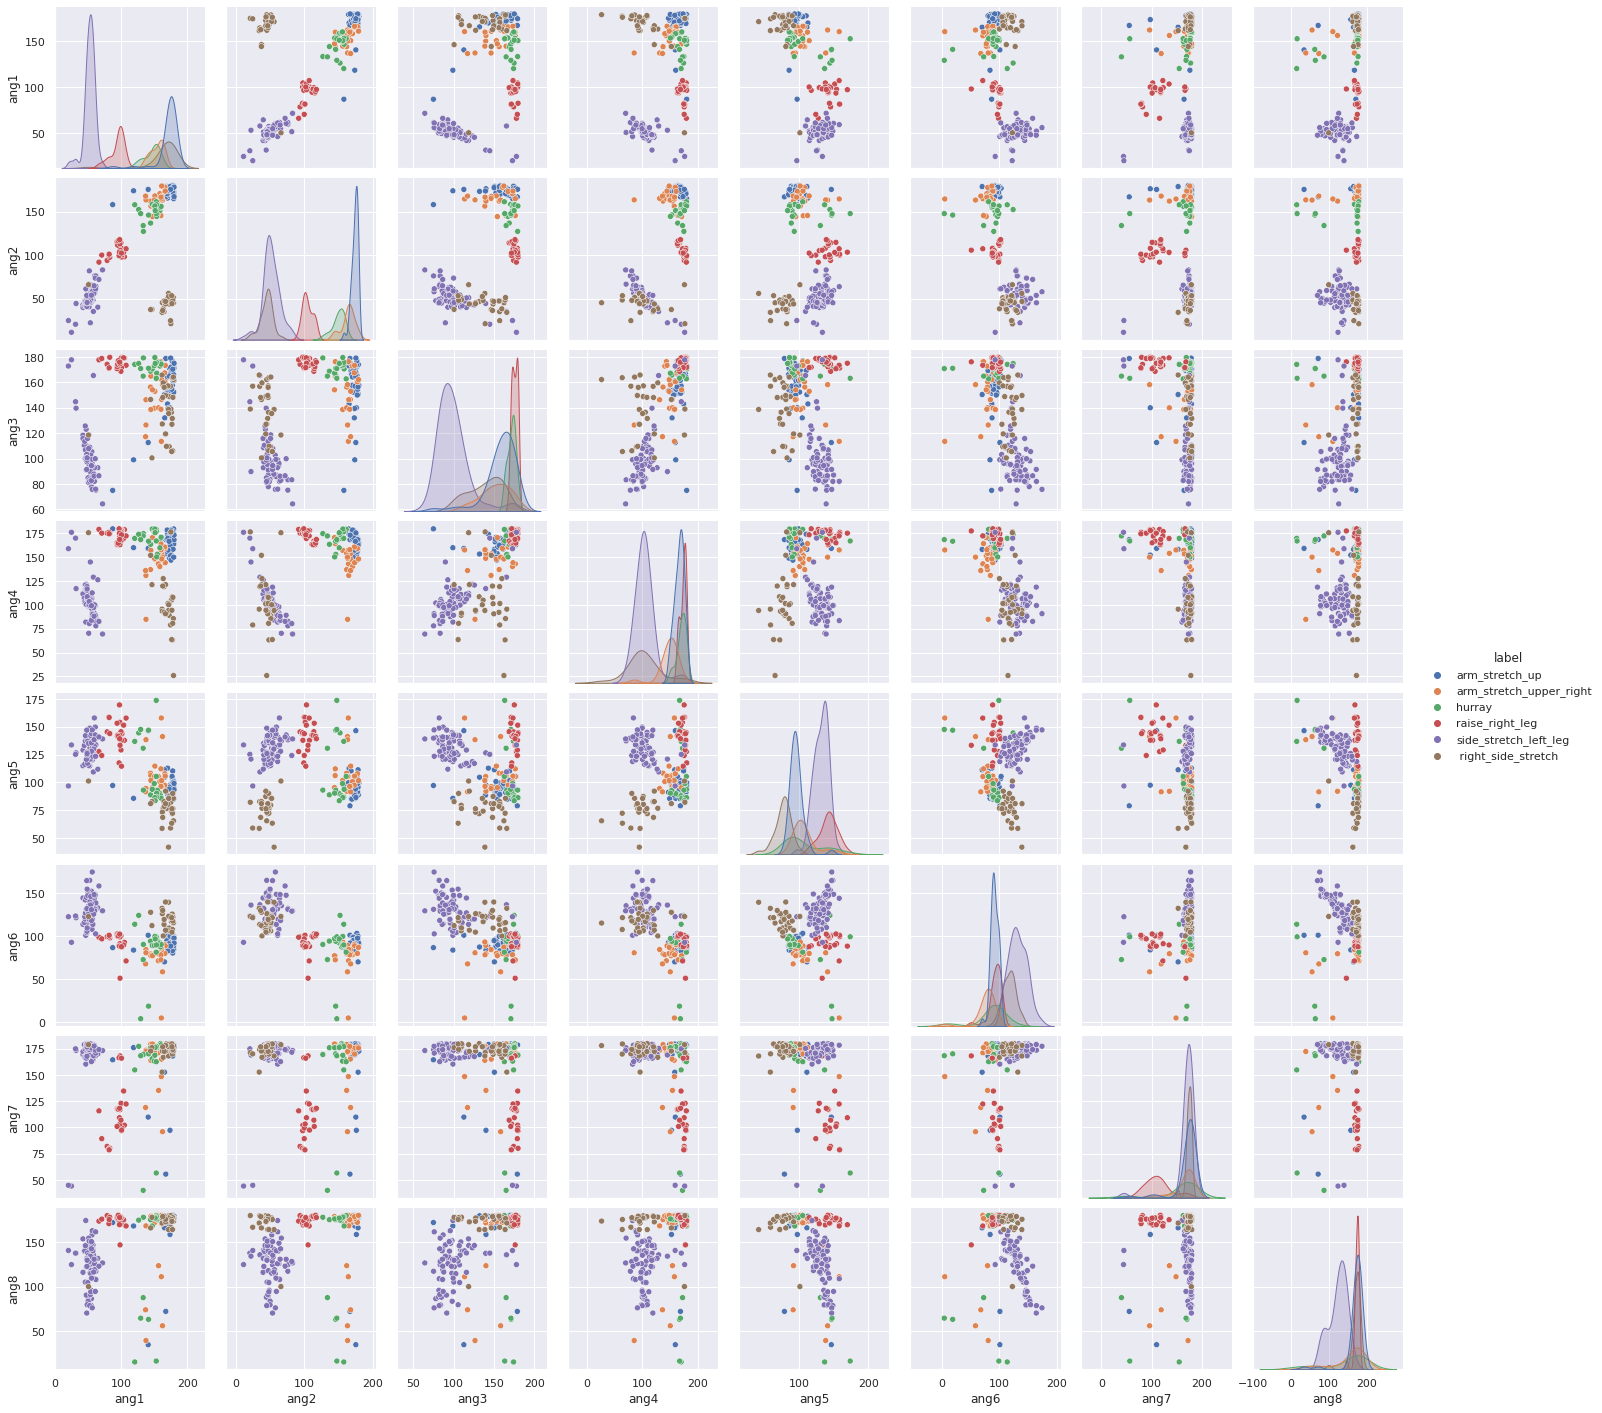

In [8]:
import seaborn as sns
sns.set()

sns.pairplot(data=df, hue='label')
plt.show()

# Learning Gaussian Naïve Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
# class probability p(Ck)
gnb.class_prior_

array([0.08913649, 0.08356546, 0.08356546, 0.0362117 , 0.1086351 ,
       0.09749304, 0.09749304, 0.1086351 , 0.14763231, 0.14763231])

In [26]:
# mean of each feature per class for p(x|Ck)
gnb.theta_

array([[173.47065336, 174.06590979, 160.27674766, 166.21252523,
         95.42945799,  91.32236726, 169.6732017 , 172.6472494 ],
       [162.2948406 , 153.46358635, 148.1515758 , 150.72349456,
         75.60126979, 109.88192777, 153.3327033 , 166.64755666],
       [154.01339288, 164.73447261, 148.62587603, 148.72678918,
        107.93566062,  77.72912791, 167.30175942, 153.71425906],
       [142.78225965, 149.65107418, 171.7396875 , 169.82130274,
        109.89455005,  83.35987516, 160.83822341, 139.18891122],
       [ 45.42822151, 164.09929233, 104.3670196 , 137.71563802,
        117.50566794,  76.26238947, 170.06515755, 174.32650083],
       [104.76142161,  93.68499173, 173.50778928, 175.92589546,
         92.35531599, 141.92385584, 174.30428543, 116.55993245],
       [ 94.62212838, 104.78511695, 174.58778182, 171.71364437,
        145.71348705,  92.43765209, 108.87384347, 173.17535564],
       [162.00116234,  43.64564213, 137.61710775, 103.1006944 ,
         77.69993506, 116.2884945

In [27]:
# variance of each feature per class for p(x|Ck)
gnb.sigma_

array([[ 113.49852652,   17.78423798,  233.40348488,   66.36757724,
          57.04263969,   49.19561122,  632.28413672,  346.77776176],
       [  90.05377495,   97.95791477,  380.63675067,  348.345756  ,
         405.54337362,  332.62134002, 1903.11742357,  349.60164813],
       [ 111.70750958,  107.18522656,  348.66549491,  385.46542208,
         307.4398728 ,  416.99886269,  259.81627826, 1797.21427667],
       [ 124.39322596,   59.57634498,   16.83368055,   81.56654925,
         648.95711699, 1086.50483571, 1257.91786467, 3157.56049835],
       [  73.35889206,  767.26910939,  903.70033392,  339.15701725,
         105.90264605,  139.6779869 ,  296.8901994 ,   15.98733892],
       [  54.41527754,  113.96361828,   27.82181782,    9.11714171,
         142.99667613,  185.54625504,   56.13826392,  756.73668978],
       [  83.19312567,   51.0196461 ,   12.91483649,   31.20144222,
         118.75313743,  108.88633289,  433.29857441,   34.008615  ],
       [ 767.94076437,   81.38411492,  43

### Model evaluation

In [28]:
# predict class of X_test[10] ~ X_test[14]
gnb.predict(X_test[10:16])

array(['raise_right_leg', 'raise_left_leg', 'right_side_stretch',
       'arm_stretch_upper_right', 'right_side_stretch',
       'side_stretch_right_leg'], dtype='<U23')

In [29]:
# predict class probabilty of X_test[10] ~ X_test[14]
gnb.predict_proba(X_test[10:16])

array([[1.40230772e-074, 8.81818512e-020, 2.53161814e-018,
        4.21698472e-014, 1.03345336e-015, 1.56416269e-016,
        1.00000000e+000, 3.87921243e-043, 4.34905430e-023,
        7.95485808e-029],
       [6.51251876e-084, 1.02959606e-018, 7.05459081e-018,
        7.74431576e-015, 6.68067771e-056, 1.00000000e+000,
        4.96199418e-026, 1.59295400e-015, 1.61494778e-024,
        2.87423531e-028],
       [7.01319981e-262, 4.66862859e-030, 7.88339232e-036,
        9.19624819e-062, 3.67487928e-054, 8.41336052e-172,
        1.03604731e-085, 1.00000000e+000, 3.66930861e-051,
        1.23533820e-024],
       [5.58488198e-004, 1.41461333e-002, 9.84244198e-001,
        1.05118071e-003, 2.30785137e-037, 8.29065959e-051,
        2.24242630e-034, 7.35669911e-047, 1.25486252e-063,
        9.30518645e-083],
       [7.59024580e-229, 6.84704782e-031, 3.83612732e-035,
        2.09842008e-087, 1.13680845e-060, 3.61628581e-206,
        2.26317529e-125, 1.00000000e+000, 2.44539573e-061,
        1.9

In [30]:
# Compute train accuracy
acc = gnb.score(X_train, y_train)
print("Train Accuracy : ", acc)

Train Accuracy :  0.9192200557103064


In [32]:
# Compute test accuracy
acc = gnb.score(X_test, y_test)
print("Test Accuracy : ", acc)

Test Accuracy :  0.9090909090909091


In [37]:
import joblib
filename = '221105NBC.json'
joblib.dump(gnb, filename)

['221105NBC.json']

In [38]:
loaded_model = joblib.load(filename)
result = loaded_model.predict([[160.10185814366014, 145.4736111633587, 176.36352474005153,
                             164.33949339536923, 112.23617610988757, 72.49913873104714,
                             176.26793438403845, 176.35707640680857]])
print(result)

['hurray']


# SAV 로 저장

In [34]:
import joblib
filename = '221105NBC.sav'
joblib.dump(gnb, filename)
#gnb.save_model('221030NBC.json')

['221105NBC.sav']

In [16]:
import joblib
loaded_model = joblib.load(filename)
result = loaded_model.predict([[160.10185814366014, 145.4736111633587, 176.36352474005153,
                             164.33949339536923, 112.23617610988757, 72.49913873104714,
                             176.26793438403845, 176.35707640680857]])
print(result)

['hurray']


### Plotting the decision boundary

In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v', 's', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange', 'black', 'pink', 'green', 'yellow')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x3_min, x3_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    x4_min, x4_max = X[:, 3].min() - 1, X[:, 3].max() + 1
    x5_min, x5_max = X[:, 4].min() - 1, X[:, 4].max() + 1
    x6_min, x6_max = X[:, 5].min() - 1, X[:, 5].max() + 1
    x7_min, x7_max = X[:, 6].min() - 1, X[:, 6].max() + 1
    x8_min, x8_max = X[:, 7].min() - 1, X[:, 7].max() + 1
    xx1, xx2, xx3, xx4, xx5, xx6, xx7, xx8 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                                         np.arange(x2_min, x2_max, resolution),
                                                         np.arange(x3_min, x3_max, resolution),
                                                         np.arange(x4_min, x4_max, resolution),
                                                         np.arange(x5_min, x5_max, resolution),
                                                         np.arange(x6_min, x6_max, resolution),
                                                         np.arange(x7_min, x7_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel(), xx3.ravel(), xx4.ravel(), 
                                     xx5.ravel(), xx6.ravel(), xx7.ravel(), xx8.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, xx3, xx4, xx5, xx6, xx7, xx8, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [23]:
from sklearn.naive_bayes import GaussianNB

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=gnb)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

ValueError: broadcast dimensions too large.

# Support Vector Machine

In [115]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=0.1)
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1, random_state=1)

In [116]:
# Train accuracy
acc = svm.score(X_train, y_train)
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.3533


In [117]:
# Test accuracy
acc = svm.score(X_test, y_test)
print("Test accuracy : %.4f" % acc)

Test accuracy : 0.3538


In [99]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=svm, test_idx=range(151, 215))

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

ValueError: X.shape[1] = 2 should be equal to 8, the number of features at training time

In [ ]:
# predict for the list [[5, 5], [10, 10], [20, 20]] using svm
print(svm.predict([[5, 5], [10, 10], [20, 20]]))